In [284]:
import numpy as np
from sklearn.neighbors import KDTree
from sklearn.neighbors import BallTree
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pickle
import time

We define our data

C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not po

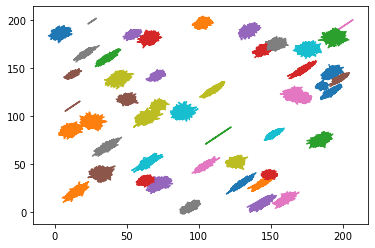

In [172]:
X = np.empty((0,0))
data=[]
n = 50
for i in range(n):
    mean = np.random.randint(200, size=2)
    line_cov = np.random.randint(10, size=2)
    cov = np.array([line_cov, np.flip(line_cov)])
    x = np.random.multivariate_normal(mean, cov, 1000)
    X = np.append(X,np.concatenate([mean,cov[0],cov[1]]))
    data.append(x)
    plt.plot(x[:,0],x[:,1])
plt.show()
X = X.reshape(n,6)

We define the Wasserstein metric

In [166]:
from sklearn.neighbors import DistanceMetric
from numpy import linalg as LA
def wasserstein(x, y):
    mean_x = np.array(x[0:2])
    cov_x = np.array(x[2:6]).reshape(2,2)
    mean_y = np.array(y[0:2])
    cov_y = np.array(y[2:6]).reshape(2,2)
    dist = 0
    dist = LA.norm(mean_x-mean_y)**2
    dist += np.trace(cov_x + cov_y - 2* (cov_y**0.5*cov_x*cov_y**0.5)**0.5)
    return dist

We build the tree with the Wasserstein metric.  
We have to use the BallTree because KDTree is not working with metric not defined by scikit-learn. We also try to remplace the KDTree function by the BallTree function in the test code of Anda and the result was very similar but slightly worst.

In [182]:
number_of_feature = 5
tree = BallTree(X, metric=wasserstein)
dist, ind = tree.query(X[:number_of_feature], k=5) 
print(dist)
print(ind)

[[   0.           82.          232.50806662  397.11145618  400.50806662]
 [   0.          122.          196.          441.06674091  545.70177872]
 [   0.          250.70177872  507.40408206  867.40408206  950.372583  ]
 [   0.          122.          458.          698.          807.        ]
 [   0.          160.6862915   950.372583    982.         1489.11145618]]
[[ 0 30 25 16 10]
 [ 1  3 40 14 36]
 [ 2 47 38  5  4]
 [ 3  1 40  8 36]
 [ 4 43  2 37 47]]


In [181]:
tree = KDTree(X, metric=wasserstein)
dist, ind = tree.query(X[:1], k=5) 
print(dist)
print(ind)

ValueError: metric PyFuncDistance is not valid for KDTree

We can see that our method work. (In blue the data for the gaussian we want, in red the data for the K near gaussian).

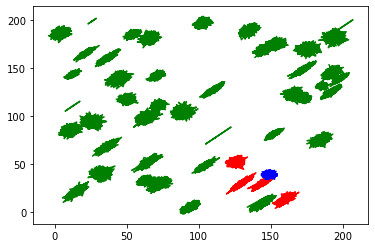

In [220]:
vrai = np.random.randint(number_of_feature)
for i in range(n):
    if(i==vrai):
        plt.plot(data[i][:,0],data[i][:,1],c='blue')
    elif(i in ind[vrai]):
        plt.plot(data[i][:,0],data[i][:,1],c='red')
    else:
        plt.plot(data[i][:,0],data[i][:,1],c='green')

Now we try to use data with approximately the same mean but a covariance very different

C:\Users\lucas\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


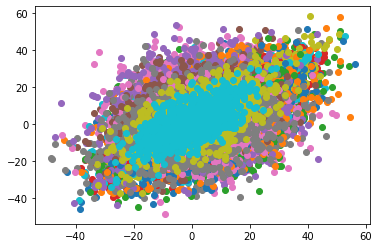

In [225]:
X = np.empty((0,0))
data=[]
n = 50
for i in range(n):
    mean = np.random.randint(10, size=2)
    line_cov = np.random.randint(200, size=2)
    cov = np.array([line_cov, np.flip(line_cov)])
    x = np.random.multivariate_normal(mean, cov, 1000)
    X = np.append(X,np.concatenate([mean,cov[0],cov[1]]))
    data.append(x)
    plt.scatter(x[:,0],x[:,1])
plt.show()
X = X.reshape(n,6)

In [235]:
number_of_feature = 5
tree = BallTree(X, metric=wasserstein)
dist, ind = tree.query(X[:number_of_feature], k=3) 
print(dist)
print(ind)

[[0.         2.35222188 4.55753752]
 [0.         1.35472148 2.65292114]
 [0.         1.22382001 2.17516396]
 [0.         4.76191906 7.52916232]
 [0.         5.040004   8.53926044]]
[[ 0  2 47]
 [ 1 27 32]
 [ 2 34 29]
 [ 3 26 21]
 [ 4 49 28]]


We can see that it works well also.

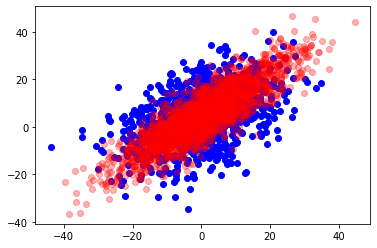

In [236]:
vrai = np.random.randint(number_of_feature)
for i in range(n):
    if(i==vrai):
        plt.scatter(data[i][:,0],data[i][:,1],c='blue')
    elif(i in ind[vrai]):
        plt.scatter(data[i][:,0],data[i][:,1],c='red',alpha=0.3)

One of the main drawbacks of define our own metric is the execution time, we are going to see if it is really a big problem.

In [273]:
X = np.empty((0,0))
time_wasserstein = []
time_euclidean = []
for n in np.logspace(0,5,6):
    X = np.empty((0,0))
    for i in range(int(n)):
        mean = np.random.randint(200, size=2)
        line_cov = np.random.randint(10, size=2)
        cov = np.array([line_cov, np.flip(line_cov)])
        X = np.append(X,np.concatenate([mean,cov[0],cov[1]]))
    X = X.reshape(int(n),6)
    start_time = time.time()
    BallTree(X, metric=wasserstein)
    time_wasserstein.append(time.time() - start_time)
    start_time = time.time()
    BallTree(X, metric='euclidean')
    time_euclidean.append(time.time() - start_time)
    print(n)

1.0
10.0
100.0
1000.0
10000.0
100000.0


Text(0, 0.5, 'Execution time (s)')

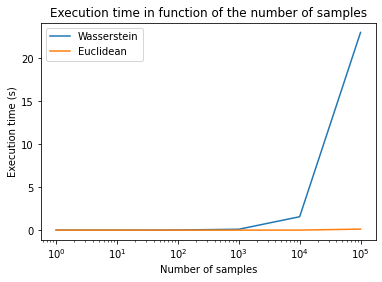

In [289]:
plt.plot(np.logspace(0,5,6),time_wasserstein,label='Wasserstein')
plt.plot(np.logspace(0,5,6),time_euclidean,label="Euclidean")
plt.xscale(value='log')
plt.legend()
plt.title("Execution time in function of the number of samples")
plt.xlabel("Number of samples")
plt.ylabel("Execution time (s)")

We can observe that using our metric is really slow.

So we use a metric which return just a zero (for the test)

In [291]:
def small(x, y):
    return 0

In [292]:
X = np.empty((0,0))
time_test = []
for n in np.logspace(0,5,6):
    X = np.empty((0,0))
    for i in range(int(n)):
        mean = np.random.randint(200, size=2)
        line_cov = np.random.randint(10, size=2)
        cov = np.array([line_cov, np.flip(line_cov)])
        X = np.append(X,np.concatenate([mean,cov[0],cov[1]]))
    X = X.reshape(int(n),6)
    start_time = time.time()
    BallTree(X, metric=small)
    time_test.append(time.time() - start_time)
    print(n)

1.0
10.0
100.0
1000.0
10000.0
100000.0


Text(0, 0.5, 'Execution time (s)')

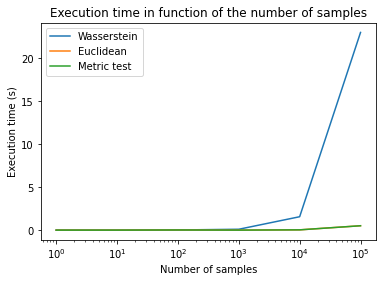

In [297]:
plt.plot(np.logspace(0,5,6),time_wasserstein,label='Wasserstein')
plt.plot(np.logspace(0,5,6),time_test,label="Euclidean")
plt.plot(np.logspace(0,5,6),time_test,label="Metric test")
plt.xscale(value='log')
plt.legend()
plt.title("Execution time in function of the number of samples")
plt.xlabel("Number of samples")
plt.ylabel("Execution time (s)")

We see that the problem is from our metric. So we need to optimize it in order to use it in real application.